# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [50]:
import pandas as pd
import numpy as np
! git clone https://github.com/DS3001/visualization

fatal: destination path 'visualization' already exists and is not an empty directory.


In [51]:
df = pd.read_csv('./visualization/assignment/data/college_completion.csv', low_memory = False)
df.head(5)

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


**2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.**

In [52]:
print("Number of Dimensions:", df.shape, '\n' )
print(df.value_counts, "\n")
print(df.head)

Number of Dimensions: (3798, 63) 

<bound method DataFrame.value_counts of       index  unitid                                chronname             city  \
0         0  100654                   Alabama A&M University           Normal   
1         1  100663      University of Alabama at Birmingham       Birmingham   
2         2  100690                       Amridge University       Montgomery   
3         3  100706      University of Alabama at Huntsville       Huntsville   
4         4  100724                 Alabama State University       Montgomery   
...     ...     ...                                      ...              ...   
3793   3793  461528                Grace College of Divinity     Fayetteville   
3794   3794  462354  John Paul the Great Catholic University        Escondido   
3795   3795  466921  Chamberlain College of Nursing-Missouri        St. Louis   
3796   3796  474881              Minneapolis Media Institute            Edina   
3797   3797  475291            Bro

**3. Cross tabulate control and level. Describe the patterns you see.**

In [53]:
print(pd.crosstab(df.control, df.level))

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


In [54]:
print(pd.crosstab(df.control, df.level, normalize = 'all'))

level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403


In [55]:
print(df.control.value_counts())

Public                    1558
Private not-for-profit    1248
Private for-profit         992
Name: control, dtype: int64


> The majority of colleges are 4-year Private not-for-profit at 31%. Only 2% of colleges are 2-year Private not-for-profit. The majority of colleges are public with 1558 institutions, and the minority of colleges are Private for-profit with 992 institutions.




**4. For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.**

<Axes: >

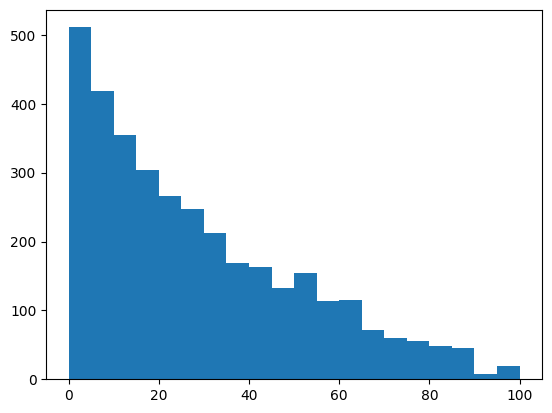

In [56]:
df['grad_100_value'].hist(bins=20,grid=False)

<Axes: ylabel='Density'>

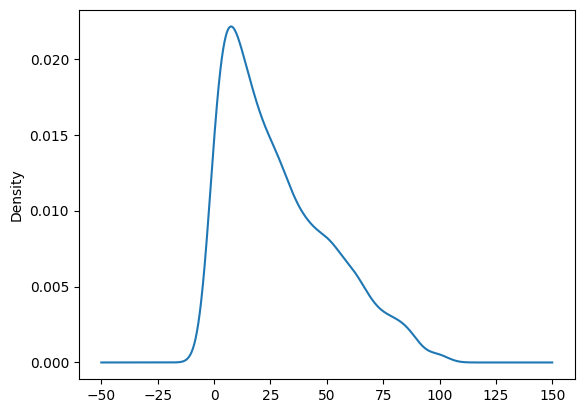

In [57]:
df['grad_100_value'].plot.density()

<Axes: >

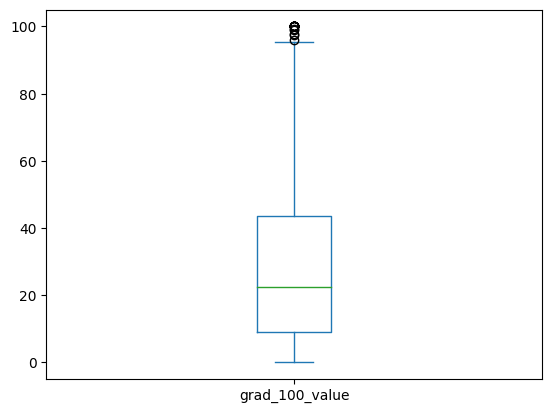

In [58]:
df['grad_100_value'].plot.box()

In [59]:
df['grad_100_percentile'].describe()

count    3467.000000
mean       46.728295
std        30.541469
min         0.000000
25%        20.000000
50%        46.000000
75%        73.000000
max       100.000000
Name: grad_100_percentile, dtype: float64

**5. For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see. Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control. Which institutions appear to have the best graduation rates?**

In [60]:
import seaborn as sns

<Axes: xlabel='grad_100_value', ylabel='Density'>

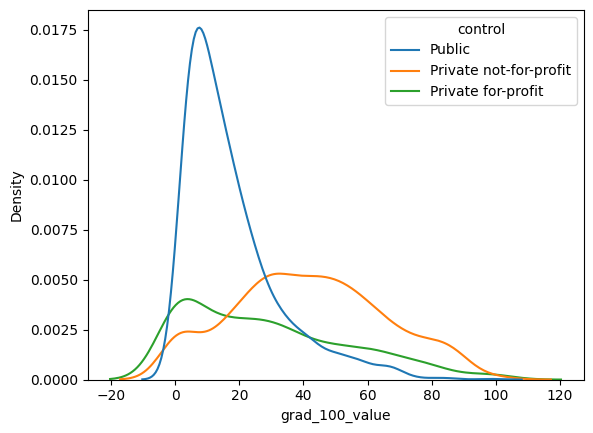

In [61]:
sns.kdeplot(data = df, x = "grad_100_value", hue = "control")

<Axes: xlabel='grad_100_value', ylabel='Density'>

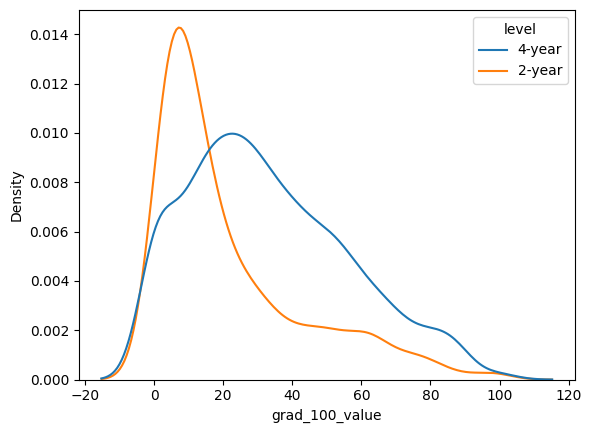

In [62]:
sns.kdeplot(data = df, x = "grad_100_value", hue = "level")

In [63]:
df.loc[:,['level','grad_100_value']].groupby(['level']).describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

In [64]:
df.loc[:,['control','grad_100_value']].groupby(['control']).describe()

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8



> Private not-for-profit institutions have the highest graduation rate at 41%. Between 2-year and 4-year institutions, 4-year have a 12% higher gradutation rate.






**6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?**

<Axes: xlabel='grad_100_value', ylabel='Density'>

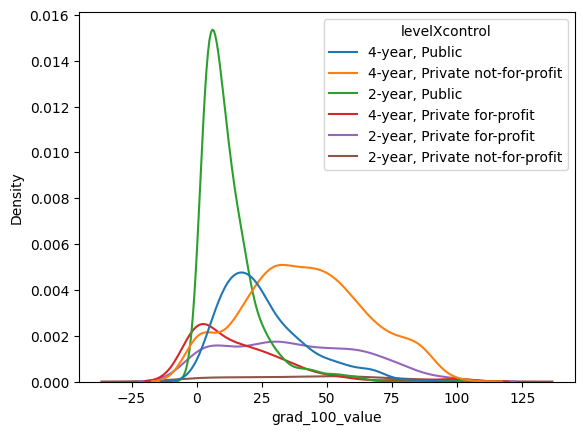

In [66]:
df['levelXcontrol'] = df['level']+', '+df['control']
sns.kdeplot(data = df, x = "grad_100_value", hue = "levelXcontrol")

In [67]:
df.loc[:,['levelXcontrol','grad_100_value']].groupby(['levelXcontrol']).describe()

grad_100_value                             \
                                        count       mean        std  min   
levelXcontrol                                                              
2-year, Private for-profit              461.0  37.197614  25.497380  0.0   
2-year, Private not-for-profit           68.0  41.913235  28.348302  0.0   
2-year, Public                          926.0  12.400000  10.893600  0.0   
4-year, Private for-profit              318.0  17.382704  20.788525  0.0   
4-year, Private not-for-profit         1121.0  41.645674  23.243453  0.0   
4-year, Public                          573.0  25.561082  16.403902  0.0   

                                                             
                                   25%   50%     75%    max  
levelXcontrol                                                
2-year, Private for-profit      15.800  33.9  57.800  100.0  
2-year, Private not-for-profit  16.225  44.4  61.200  100.0  
2-year, Public                   5.100   9.4  16.175   97.8  
4-year, Private for-profit       0.000  12.5  26.325  100.0  
4-year, Private not-for-profit  25.000  41.0  57.800  100.0  
4-year, Public                  13.600  21.8  33.800   86.3



> According to this new density plot, 2-year, Private not-for-profit and 4-year Private not-for-profit institutions have the highest and nearly the same average graduation rate. 2-year, Public institutions have the lowest graduation rate




**7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.**


In [ ]:
sns.kdeplot(data = df, x = "aid_value")

In [ ]:
sns.kdeplot(data = df, x = "aid_value", hue = 'level')

In [ ]:
sns.kdeplot(data = df, x = "aid_value", hue = 'control')

In [71]:
df.loc[:,['level','aid_value']].groupby(['level']).describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

In [72]:
df.loc[:,['control','aid_value']].groupby(['control']).describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0



>Two-year institutions often provide less aid because they are cheaper than 4-year insitutions. Private not-for-profit institutions provide more aid because more funding is allocated towards the students. Private for-profit and Public institutons provide a similar amount of aid.



**8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?**

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

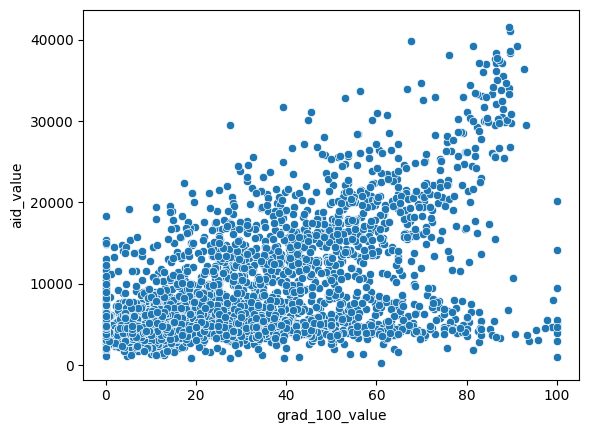

In [73]:
sns.scatterplot(data=df,x='grad_100_value',y='aid_value')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

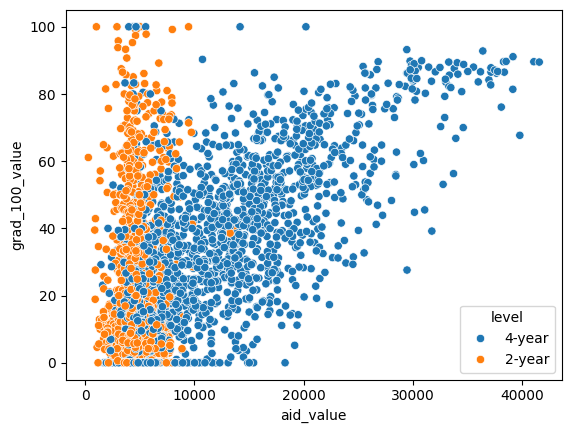

In [74]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value', hue = 'level')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

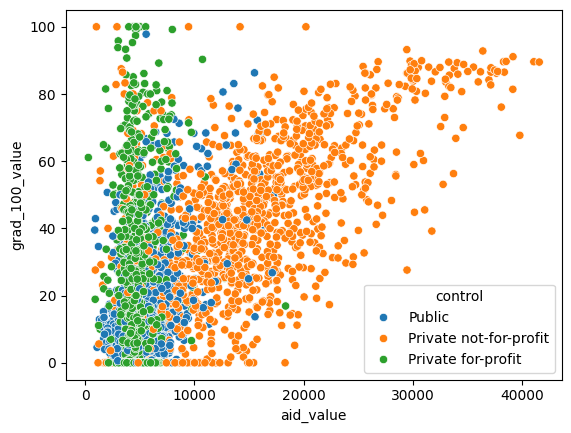

In [75]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value', hue = 'control')



> It appears that 4-Year and Private not-for-profit institutions have an increase in graduation rate with an increase in aid_value. This is likely because the institutions are expensive, and increased aid makes it more possible for students to graduate.



**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [125]:
df = pd.read_csv('/content/MedicaidSpendingByDrugData.csv', low_memory = False)

**2.Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.**

In [126]:
df.head()

,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2017,Tot_Dsg_Unts_2017,Tot_Clms_2017,Avg_Spnd_Per_Dsg_Unt_Wghtd_2017,Avg_Spnd_Per_Clm_2017,Outlier_Flag_2017,...,Avg_Spnd_Per_Clm_2020,Outlier_Flag_2020,Tot_Spndng_2021,Tot_Dsg_Unts_2021,Tot_Clms_2021,Avg_Spnd_Per_Dsg_Unt_Wghtd_2021,Avg_Spnd_Per_Clm_2021,Outlier_Flag_2021,Chg_Avg_Spnd_Per_Dsg_Unt_20_21,CAGR_Avg_Spnd_Per_Dsg_Unt_17_21
0,8hr Arthritis Pain,Acetaminophen,1,Overall,NaN,NaN,NaN,NaN,NaN,NaN,...,9.281739,1.0,331.69,4642.000,54,0.071454,6.142407,1,0.469539,0.047199
1,8hr Arthritis Pain,Acetaminophen,1,Topco,NaN,NaN,NaN,NaN,NaN,NaN,...,9.281739,1.0,331.69,4642.000,54,0.071454,6.142407,1,-0.253762,0.047199
2,A & D,Vitamins A And D,1,Overall,NaN,NaN,NaN,NaN,NaN,NaN,...,7.866098,1.0,253.76,9136.000,26,0.027776,9.760000,1,0.364446,0.594980
3,A & D,Vitamins A And D,1,Schering-Plough,NaN,NaN,NaN,NaN,NaN,NaN,...,7.866098,1.0,253.76,9136.000,26,0.027776,9.760000,1,0.356607,0.594980
4,A And D,Vits A And D/White Pet/Lanolin,1,Overall,406.33,3502.5,47.0,0.116011,8.645319,1.0,...,7.288947,1.0,106.45,1032.708,14,0.103079,7.603571,1,0.296316,-0.029117




> The data dictionary does not document how missings are handled. It appears that missings are already writtn as NaN. The dictionary explains the meaning of each column and some values in the columns. I think the data dictionary is comprehensive. For values that are significantly impacted by outlier values, the value is set to "1".

**3. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.**


In [128]:
print("Number of Dimensions:", df.shape, '\n' )

Number of Dimensions: (16146, 36) 



In [135]:
brand_names = df['Brnd_Name']
number_of_manufacturers = df['Tot_Mftr']
number_of_claims_2021 = df['Tot_Clms_2021']

In [132]:
brand_name = brand_name.replace(' ', np.nan) #replace any blank names with NaN



> I am analyzing the brand names of each drug, the number of manufacturers of that drug, and the number of claims in 2021 for that drug. I am curious to see how the number of manufacturers relates to the amount of claims of the drug. The number of claims is the number of perscriptions fulfilled for that drug in 2021.



**4. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?**

<Axes: >

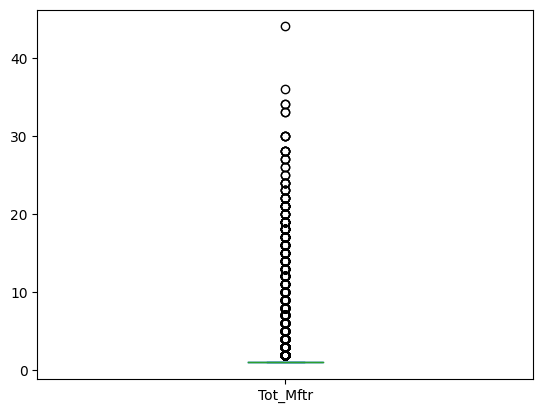

In [133]:
number_of_manufacturers.plot.box()

<Axes: >

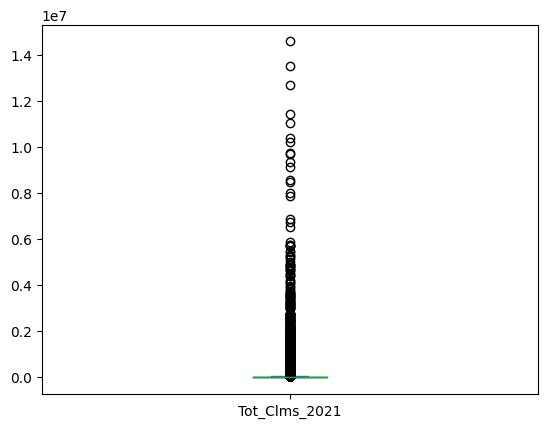

In [134]:
number_of_claims_2021.plot.box()

In [136]:
brand_names.hist(bins=20,grid=False)

<Axes: >

Error in callback <function _draw_all_if_interactive at 0x7a2d79d28f70> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7a2d79d281f0> (for post_execute):


KeyboardInterrupt: 

**6. Create a scatter plot, and describe the relationship you see.**

**7. Create a table (cross tabulation, variance-covariance, or a .describe() five-number summary), and explain what you see.**